# Advertising_Sales_Channel_Prediction:-

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn

import warnings
warnings.filterwarnings('ignore')

# Importing the Dataset:-

In [30]:
ad=pd.read_csv("Advertising.csv")
ad

,S.No.,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [31]:
# In our dataset S.No. is an extra column, we have to drop that;

ad=ad.drop('S.No.',axis=1)
ad

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [8]:
ad.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [9]:
ad.tail()

,TV,radio,newspaper,sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [10]:
ad.sample()

,TV,radio,newspaper,sales
168,215.4,23.6,57.6,17.1


In [11]:
ad.shape

(200, 4)

In [12]:
ad.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

# Data Cleaning:-

In [32]:
ad.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [ ]:
#Above observations shows there are no null values.

In [14]:
ad.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [ ]:
# All the data types are same, now we can easily
# work with this dataset.

In [15]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [16]:
ad.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# EDA:-

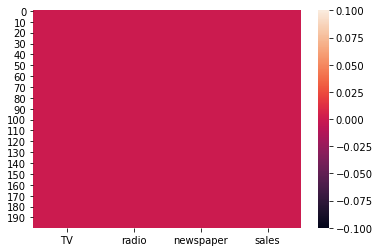

In [19]:
sns.heatmap(ad.isnull())
plt.show()

In [20]:
ad.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

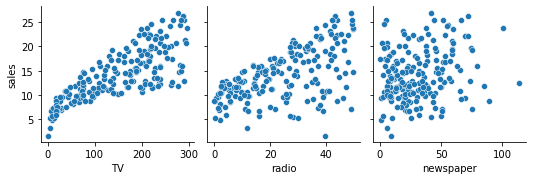

In [22]:
sns.pairplot(data=ad,x_vars=['TV', 'radio', 'newspaper'],
                         y_vars='sales')

plt.show()

In [ ]:
# Above observations shows that comparitively 'TV' and 'radio' has
# linear relation with target('sales') column.

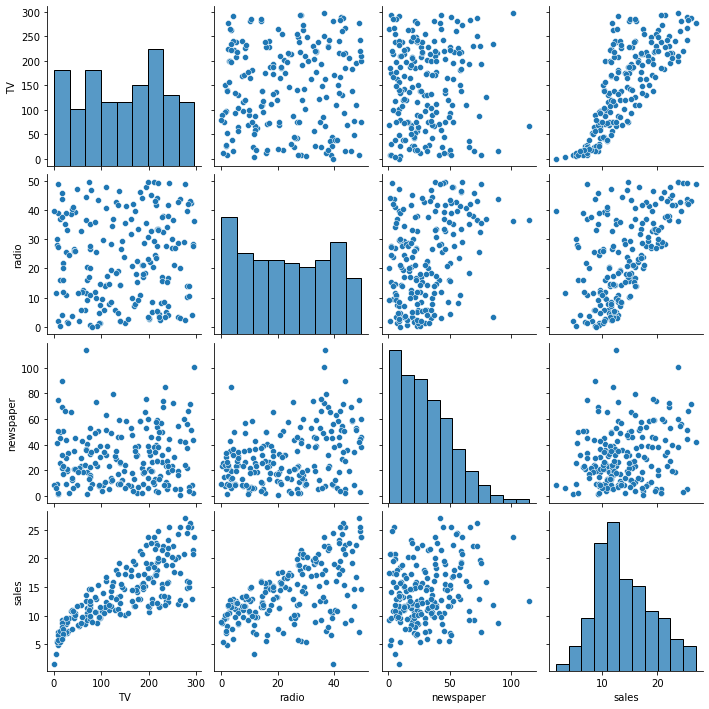

In [23]:
sns.pairplot(ad)
plt.show()

In [ ]:
# Above observations shows that the Spending budget advertisements
# on TV is in all range,same for Radio but less than TV. But on
# newspapers,less budget is spend.

# Correlation:-

In [24]:
# Checking the Correlation with respect to target variable(Age):-

ad.corr()['sales'].sort_values()

newspaper    0.228299
radio        0.576223
TV           0.782224
sales        1.000000
Name: sales, dtype: float64

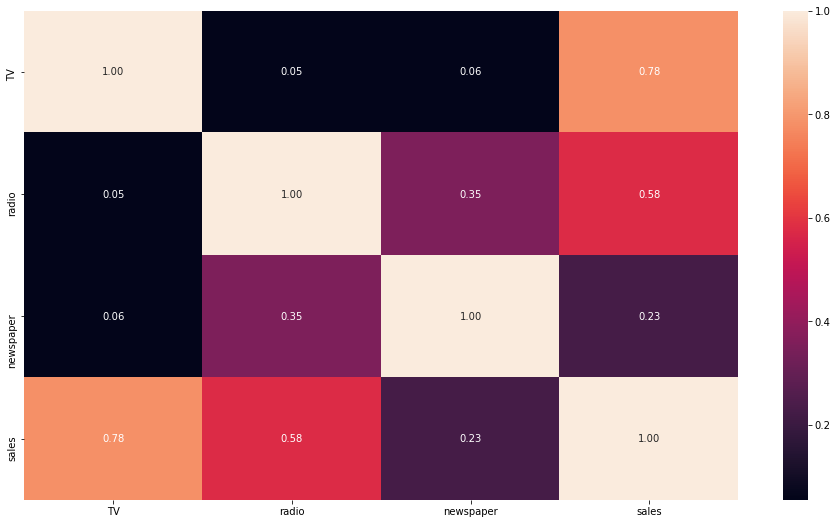

In [25]:
plt.figure(figsize=(16,9))
sns.heatmap(ad.corr(),annot=True,fmt='0.2f')
plt.show()

In [ ]:
# Above observations shows that Target Sales are highly correlated with TV and 
# little correlated with Radio and Newspaper.

# Checking for the Skewness:-

In [33]:
ad.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

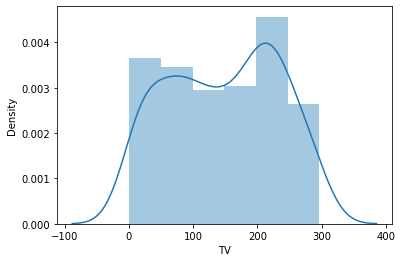

In [34]:
# checking with the distribution curve:-

sns.distplot(ad['TV'])
plt.show()

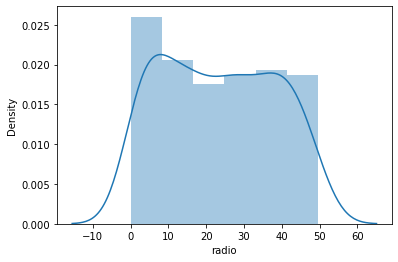

In [36]:
sns.distplot(ad['radio'])
plt.show()

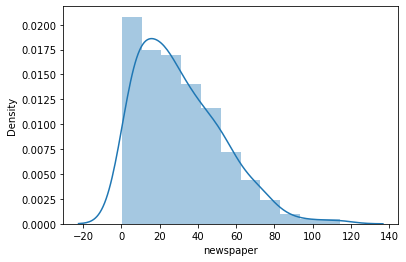

In [37]:
sns.distplot(ad['newspaper'])
plt.show()

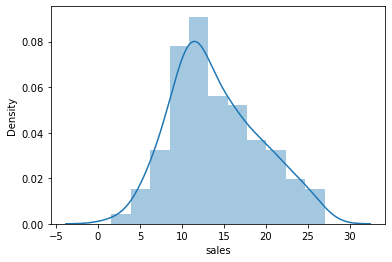

In [38]:
sns.distplot(ad['sales'])
plt.show()

In [ ]:
#So, the above visualizations shows that 'TV' and'radio'
#are highly skewed.
#Therefore the Data is not normalized.

# Outliers Removal:-

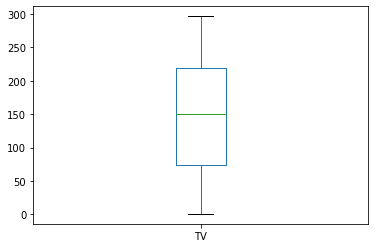

In [40]:
ad['TV'].plot.box()
plt.show()

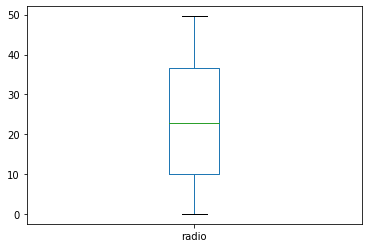

In [41]:
ad['radio'].plot.box()
plt.show()

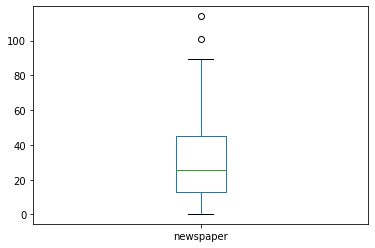

In [42]:
ad['newspaper'].plot.box()
plt.show()

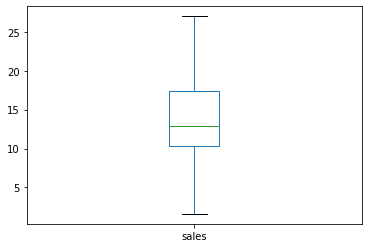

In [43]:
ad['sales'].plot.box()
plt.show()

In [44]:
from scipy.stats import zscore
z=np.abs(zscore(ad))
z

array([[9.69852266e-01, 9.81522472e-01, 1.77894547e+00, 1.55205313e+00],
       [1.19737623e+00, 1.08280781e+00, 6.69578760e-01, 6.96046111e-01],
       [1.51615499e+00, 1.52846331e+00, 1.78354865e+00, 9.07405869e-01],
       [5.20496822e-02, 1.21785493e+00, 1.28640506e+00, 8.60330287e-01],
       [3.94182198e-01, 8.41613655e-01, 1.28180188e+00, 2.15683025e-01],
       [1.61540845e+00, 1.73103399e+00, 2.04592999e+00, 1.31091086e+00],
       [1.04557682e+00, 6.43904671e-01, 3.24708413e-01, 4.27042783e-01],
       [3.13436589e-01, 2.47406325e-01, 8.72486994e-01, 1.58039455e-01],
       [1.61657614e+00, 1.42906863e+00, 1.36042422e+00, 1.77205942e+00],
       [6.16042873e-01, 1.39530685e+00, 4.30581584e-01, 6.57617064e-01],
       [9.45155670e-01, 1.17923146e+00, 2.92486143e-01, 1.04190753e+00],
       [7.90028350e-01, 4.96973404e-02, 1.22232878e+00, 6.48970529e-01],
       [1.43908760e+00, 7.99208859e-01, 1.62704048e+00, 9.26620392e-01],
       [5.78501712e-01, 1.05768905e+00, 1.07502697e

In [45]:
# index no.

np.where(z>3)

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))

In [46]:
ad_new=ad[(z<3).all(axis=1)]
ad_new

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [47]:
ad.shape

(200, 4)

In [48]:
ad_new.shape

(198, 4)

In [49]:
# percentage data loss:-

loss_percent=(200-198)/(200*100)
print(loss_percent,'%')

0.0001 %


In [50]:
# Transforming the data to remove skewness:-

import sklearn
from sklearn.preprocessing import power_transform
X=power_transform(ad,method='yeo-johnson')
X

array([[ 9.48674291e-01,  9.62246888e-01,  1.51433531e+00,
         1.46441197e+00],
       [-1.19131426e+00,  1.04017880e+00,  7.87682518e-01,
        -6.50692513e-01],
       [-1.64775660e+00,  1.37070964e+00,  1.51699753e+00,
        -8.94549951e-01],
       [ 1.41020233e-01,  1.14238689e+00,  1.21465643e+00,
         8.82528036e-01],
       [ 4.52714928e-01, -7.48650643e-01,  1.21170398e+00,
        -1.34549801e-01],
       [-1.82382233e+00,  1.51501853e+00,  1.66502354e+00,
        -1.39687742e+00],
       [-1.00249116e+00,  6.93727035e-01, -1.07753498e-01,
        -3.55780023e-01],
       [-2.10275002e-01, -1.01585443e-01, -8.44093412e-01,
        -7.56544391e-02],
       [-1.82609501e+00, -1.63345378e+00, -2.13259669e+00,
        -2.05242372e+00],
       [ 6.47644918e-01, -1.56676988e+00, -2.29003949e-01,
        -6.07561054e-01],
       [-8.83773778e-01, -1.20298758e+00, -7.22615630e-02,
        -1.05614129e+00],
       [ 7.97083554e-01,  1.80725788e-01, -1.60261898e+00,
      

In [51]:
X.ndim

2

In [52]:
X.std()

1.0

In [53]:
x=ad_new.drop(['sales'],axis=1)
x

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [54]:
y=ad_new['sales']
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 198, dtype: float64

# Machine Learning Algorithms Training and Testing Process:-

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error as MSE

In [56]:
# linear Regression;

lr=LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    train_accuracy=r2_score(y_train,pred_train)
    test_accuracy=r2_score(y_test,pred_test)
    print("At random state",{i},train_accuracy)
    print("At random state",{i},test_accuracy)
    print("\n")

At random state {0} 0.8898322019518987
At random state {0} 0.9098946359000558


At random state {1} 0.8946050839431845
At random state {1} 0.8912199077372981


At random state {2} 0.9105689646648081
At random state {2} 0.8381266733637571


At random state {3} 0.8944143192604463
At random state {3} 0.8980994665131536


At random state {4} 0.8981805823414822
At random state {4} 0.8719021920124684


At random state {5} 0.8994368014551729
At random state {5} 0.8616494043950313


At random state {6} 0.8993028842288798
At random state {6} 0.8760639888444909


At random state {7} 0.8907422790206732
At random state {7} 0.9072259879826814


At random state {8} 0.9032084965142416
At random state {8} 0.8622119821531381


At random state {9} 0.8896116143369225
At random state {9} 0.9148867690563419


At random state {10} 0.9234109258384534
At random state {10} 0.7847276428213539


At random state {11} 0.8849527337629283
At random state {11} 0.9251344460664063


At random state {12} 0.8931558909666

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=25)

In [60]:
# Cross Validation:-

train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    
    print(j,cv_score,cv_mean,train_accuracy,test_accuracy)
    print("\n")

2 [0.90399035 0.87324511] 0.8886177292201751 -0.9399674105656932 -0.45416747098739374


3 [0.90453808 0.85762614 0.90495768] 0.8890406332045909 -0.9399674105656932 -0.45416747098739374


4 [0.88811728 0.91462339 0.8469659  0.90249419] 0.8880501918930908 -0.9399674105656932 -0.45416747098739374


5 [0.87988273 0.9176965  0.92510819 0.80845813 0.89565733] 0.8853605756683912 -0.9399674105656932 -0.45416747098739374


6 [0.87914574 0.91580153 0.9057446  0.82258639 0.89447631 0.90314999] 0.8868174285063072 -0.9399674105656932 -0.45416747098739374


7 [0.87025579 0.91358851 0.89557281 0.9307179  0.78959782 0.87127391
 0.91579128] 0.883828289486476 -0.9399674105656932 -0.45416747098739374


8 [0.86439711 0.90138195 0.91755515 0.90650895 0.90438371 0.80453954
 0.89872525 0.90677597] 0.8880334554150218 -0.9399674105656932 -0.45416747098739374


9 [0.88189463 0.86333728 0.92526518 0.86926155 0.93436359 0.74755914
 0.91880613 0.88769284 0.90125656] 0.8810485430282271 -0.9399674105656932 -0.454167

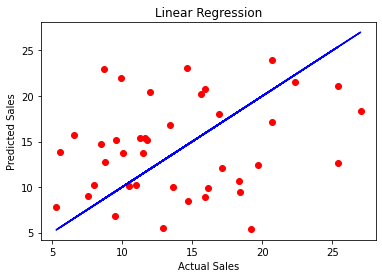

In [63]:
# Linear Regression Graph:-

plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Linear Regression')
plt.show()

# Hyperparameter Tuning:-

In [61]:
# Regularization;

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [62]:
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf= GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [64]:
# final model training;

ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
ls_score_training=ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
ls_score_training*100

88.2699582430958

In [65]:
# Ensemble technique:-

from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf= RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [66]:
rf=RandomForestRegressor(criterion='mae',max_features='auto')
rf.fit(x_train,y_train)
train_r2=rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)
print(train_r2)
rf2=r2_score(y_test,pred_decision)
print('R2_Score',rf2)
rfs=cross_val_score(rf,x,y,cv=5)
rfc=rf.score(x_train,y_train)
print('Cross_Val_Score',rfc*100)

0.9969453883094057
R2_Score 0.9771218606416514
Cross_Val_Score 99.69453883094057


In [ ]:
# So, we are getting our model accuracy 99.7% and 
# excellent R2_score 0.978 which shows that 
# our model is performing 
# "well enough".

# Saving the Model:-

In [67]:
import pickle
filename='Sales_Channel_Pred.pkl'
pickle.dump(rf,open(filename,'wb'))

# Conclusion:-

In [68]:
loaded_model=pickle.load(open('Sales_Channel_Pred.pkl','rb'))

In [69]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],
                        index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
Predicted,9.955,8.078,12.086,7.202,14.883,9.458,18.707,18.289,24.466,16.359,...,12.403,24.952,9.792,17.37,6.45,7.519,11.328,9.561,13.323,15.546
Original,9.955,8.078,12.086,7.202,14.883,9.458,18.707,18.289,24.466,16.359,...,12.403,24.952,9.792,17.37,6.45,7.519,11.328,9.561,13.323,15.546


In [70]:
conclusion.transpose()

,Predicted,Original
0,9.955,9.955
1,8.078,8.078
2,12.086,12.086
3,7.202,7.202
4,14.883,14.883
5,9.458,9.458
6,18.707,18.707
7,18.289,18.289
8,24.466,24.466
9,16.359,16.359
